[[-1.48857650e-15 -8.49715420e-02  8.83016702e-02 -2.97754563e-02
   8.08272991e-02 -1.71481808e-01  3.14546960e-01 -1.12883903e-02
  -2.98327906e-01  1.58703006e-01 -9.59722395e-02 -2.12440782e-01
   9.49431049e-02 -3.96433320e-01]]
0.13102184197075575


Text(0.5, 1.0, 'Error vs. Training Epoch')

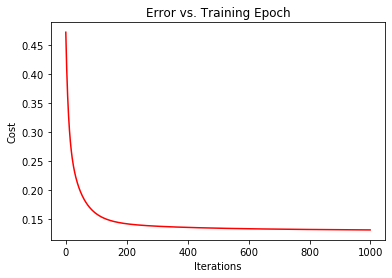

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

my_data = pd.read_csv('BostonHousing.csv')

#we need to normalize the features using mean normalization
my_data = (my_data - my_data.mean())/my_data.std()


#setting the matrixes
X = my_data.iloc[:,0:13]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

y = my_data.iloc[:,13:14].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros([1,14])

#computecost
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

#set hyper parameters
alpha = 0.01
iters = 1000

g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

finalCost = computeCost(X,y,g)
print(finalCost)

fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  
